## Exercises 1
### Tasks
1. Plot the original data with error bars.
2. Plot the residuals for each of the two cases separately.
3. List the fitted parameters and their uncertainties for both cases (absolute_sigma=True and
absolute_sigma=False).


In [55]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [56]:
np.random.seed(42) # Seed for reproducibility
x = np.linspace(0, 5, 50) # Generates 50 evenly spaced numbers from 0 to 5
y = 2.5 * np.exp(-1.3 * x) + np.random.normal(0, 0.1, size=x.size) # Generates 50 random numbers with a normal distribution
sigma = 0.1 * np.ones_like(y) # Generates an array of 50 elements with a value of 0.1, here it indicates the error

In [57]:
# Define the model function
def model(x, A, k):
    return A * np.exp(-k * x) # Exponential model

In [58]:
# Fit the data using curve_fit with absolute_sigma=True
popt_true, pcov_true = curve_fit(model, x, y, sigma=sigma, absolute_sigma=True)
parameter_error_true = np.sqrt(np.diag(pcov_true))
# Fit the data using curve_fit with absolute_sigma=False
popt_false, pcov_false = curve_fit(model, x, y, sigma=sigma, absolute_sigma=False)
parameter_error_false = np.sqrt(np.diag(pcov_false))

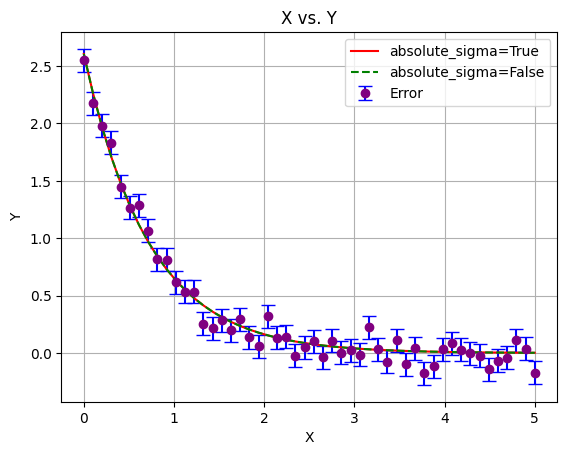

In [59]:
# Plots the generated data with error bars using sigma
plt.errorbar(x, y, yerr=sigma, fmt='o', color="purple", ecolor="blue", label='Error', capsize=5)
# Plots the linear model for both absolute_sigma=True and absolute_sigma=False
plt.plot(x, model(x, *popt_true), label=f"absolute_sigma=True", color="red")
plt.plot(x, model(x, *popt_false), label=f"absolute_sigma=False", color="green", linestyle="--")

plt.xlabel("X")  # Labels X Axis represents the square root of length
plt.ylabel("Y")  # Labels Y Axis represents the period
plt.legend()  # Shows the legend
plt.title("X vs. Y")  # Title of the plot
plt.grid() # Shows the grid
plt.show() # Shows the plot

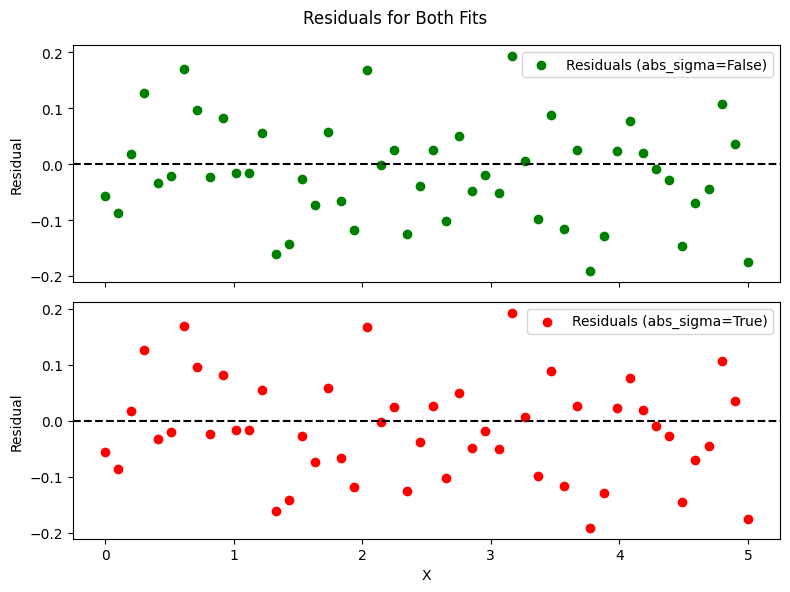

In [60]:
resid_false = y - model(x, *popt_false)
resid_true  = y - model(x, *popt_true)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

ax1.scatter(x, resid_false, color='green', label='Residuals (abs_sigma=False)')
ax1.axhline(0, color='black', linestyle='--')
ax1.set_ylabel('Residual')
ax1.legend()

ax2.scatter(x, resid_true, color='red', label='Residuals (abs_sigma=True)')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_xlabel('X')
ax2.set_ylabel('Residual')
ax2.legend()

plt.suptitle("Residuals for Both Fits")
plt.tight_layout()
plt.show()

In [61]:
# Print the fit results
print("---------- Fit Results (absolute_sigma=False) ----------")
print(f"A = {popt_false[0]:.4f} ± {parameter_error_false[0]:.4f}")
print(f"k = {popt_false[1]:.4f} ± {parameter_error_false[1]:.4f}\n")

print("----------- Fit Results (absolute_sigma=True) -----------")
print(f"A = {popt_true[0]:.4f} ± {parameter_error_true[0]:.4f}")
print(f"k = {popt_true[1]:.4f} ± {parameter_error_true[1]:.4f}")

---------- Fit Results (absolute_sigma=False) ----------
A = 2.6061 ± 0.0613
k = 1.3855 ± 0.0494

----------- Fit Results (absolute_sigma=True) -----------
A = 2.6061 ± 0.0657
k = 1.3855 ± 0.0529


### Debug Log
```
Cell In[54], line 7
      4 fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
      6 ax1.scatter(x, resid_false, color='green', label='Residuals (abs_sigma=False)')
----> 7 ax1.axhline(0, color='black', linestyle='r--')
      8 ax1.set_ylabel('Residual')
      9 ax1.legend()

ValueError: 'r--' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
```
While 'r--' is a method to input the format of the line to be both red and dashed, it's categorized under the parameter `fmt`. For clarity, this is also possible to input in separate parameters. In this case, the parameter `color` can be inputted with 'red' and the parameter `linestyle` can be inputted with '--' to achieve the same results.

### Results
![Exercise Scatter Chart](./pictures/Exercise_Scatter_Chart.png)
![Exercise Residual Chart](./pictures/Exercise_Residual_Chart.png)
```
---------- Fit Results (absolute_sigma=False) ----------
A = 2.6061 ± 0.0613
k = 1.3855 ± 0.0494

----------- Fit Results (absolute_sigma=True) -----------
A = 2.6061 ± 0.0657
k = 1.3855 ± 0.0529
```

### Result Explanation
Both the fit curves and residuals almost identical in both cases, with the only difference in the parameter error. This is because regardless of whether the parameter `absolute_sigma` is set to `True` or `False`, the sigma values used in the formula above (our input values) remain unchanged. Therefore, the numerical results of the calculation must be identical. However, the covariance is calculated differently, which results in a slight difference in the parameter error. Mathematically, `pcov(absolute_sigma=False) = pcov(absolute_sigma=True) * chisq(popt)/(M-N)`, which `M-N` is the degrees of freedom and `chisq(popt)/(M-N)` is the reduce chi-square value.